In [ ]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")


if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
from MMAR.MMAR import MMAR
from utility_functions import (
    get_df,
    get_standard_returns,
    plot_ks_comparison,
    plot_return_comparison,
    plot_simulated_paths,
)

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from dotenv import dotenv_values
from scipy import stats as st
from tqdm.notebook import tqdm

warnings.filterwarnings("ignore")

In [2]:
start_date = "2005-01-01"
end_date = "2022-12-31"
df_path = "../data/raw/spy.csv"

In [3]:
config = dotenv_values("../config/.env")

In [4]:
# ALPHA_API = config["ALPHA_API"]

In [5]:
spy = get_df(df_path, start_date, end_date)

In [6]:
spy = spy[spy.index < "31-12-2017"]

### Simulation using Volume to estimate $\theta$

In [7]:
mmar = MMAR(spy["Close"], volume=spy["Volume"])

In [8]:
n = 126  # 6 months
S0 = spy.Close.iloc[-n]
simulation = mmar.get_MMAR_MC(S0, n=n, num_sim=1_000_000)

  0%|          | 0/10000 [00:00<?, ?it/s]

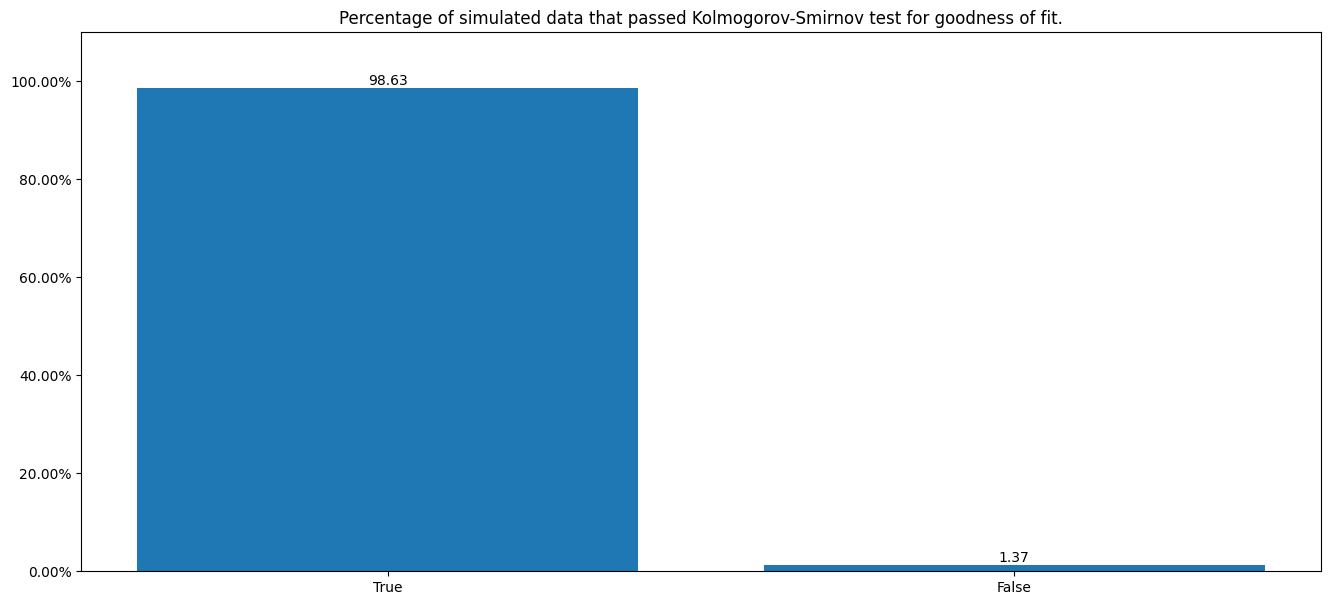

In [9]:
num_samples = min(10_000, len(simulation) * 0.1)
selection = np.random.choice(range(len(simulation)), num_samples)
results = []
for idx in tqdm(selection):
    test = st.kstest(
        get_standard_returns(spy.iloc[-n:]["Close"].values),
        get_standard_returns(simulation[idx, :]),
    )
    results.append(test.pvalue > 0.05)


plot_ks_comparison(results)

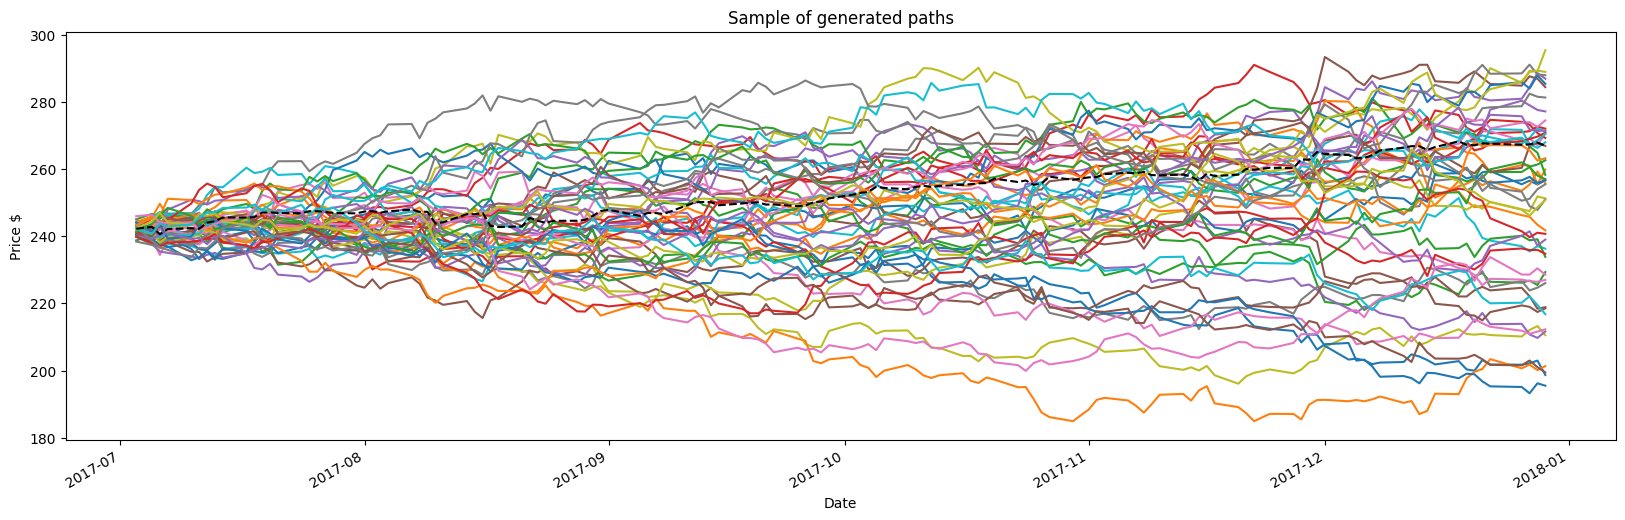

In [10]:
plot_simulated_paths(spy, simulation, n)

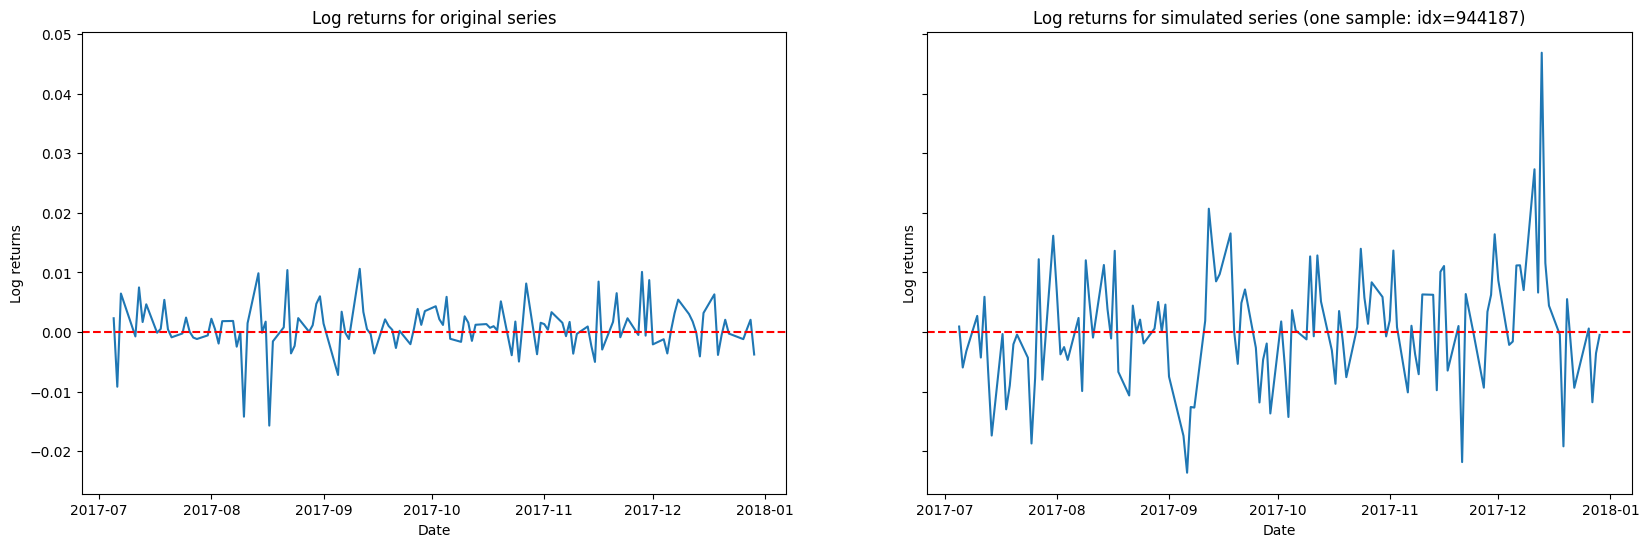

In [11]:
plot_return_comparison(spy, simulation, n)

  0%|          | 0/10000 [00:00<?, ?it/s]

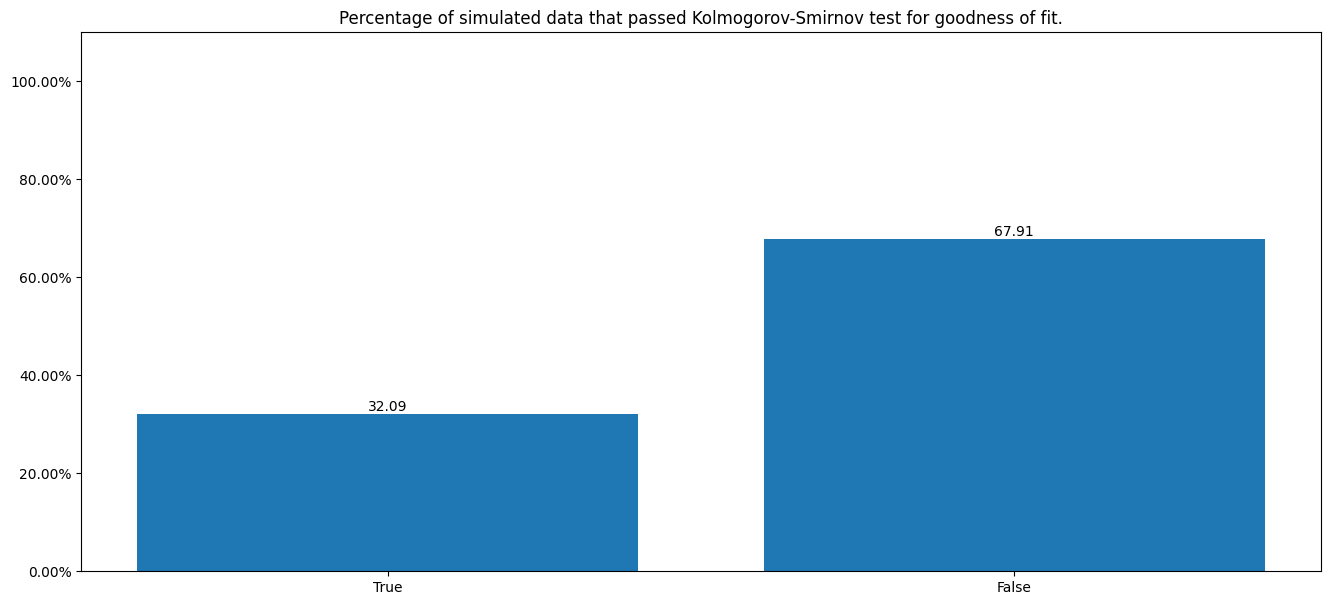

In [13]:
# Comparison using the whole dataset (we expect a worse result)
num_samples = min(10_000, len(simulation) * 0.1)
selection = np.random.choice(range(len(simulation)), num_samples)
results = []
for idx in tqdm(selection):
    test = st.kstest(
        get_standard_returns(spy["Close"].values),
        get_standard_returns(simulation[idx, :]),
    )
    results.append(test.pvalue > 0.05)

plot_ks_comparison(results)

### Simulation using random method to estimate $\theta$

In [14]:
mmar2 = MMAR(spy["Close"])

In [15]:
S0 = spy.Close.iloc[-n]
simulation2 = mmar2.get_MMAR_MC(S0, n=n, num_sim=1_000_000)

  0%|          | 0/10000 [00:00<?, ?it/s]

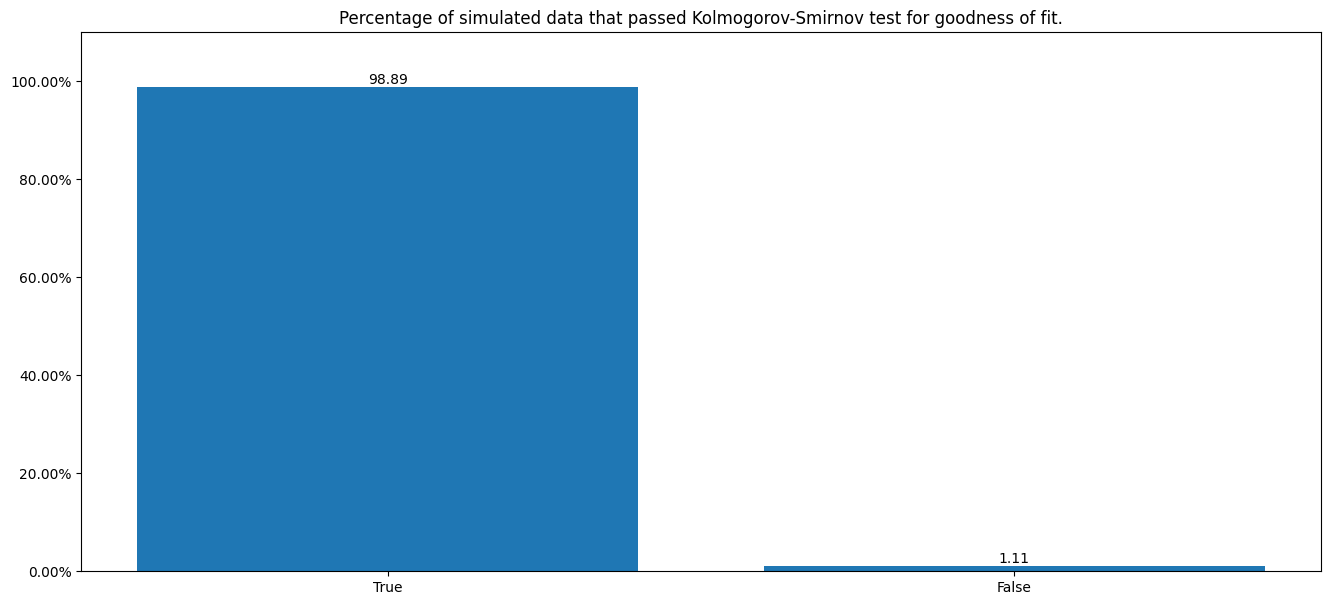

In [16]:
num_samples = min(10_000, len(simulation2) * 0.1)
selection2 = np.random.choice(range(len(simulation2)), num_samples)
results2 = []
for idx in tqdm(selection2):
    test = st.kstest(
        get_standard_returns(spy.iloc[-n:]["Close"].values),
        get_standard_returns(simulation2[idx, :]),
    )
    results2.append(test.pvalue > 0.05)


plot_ks_comparison(results2)

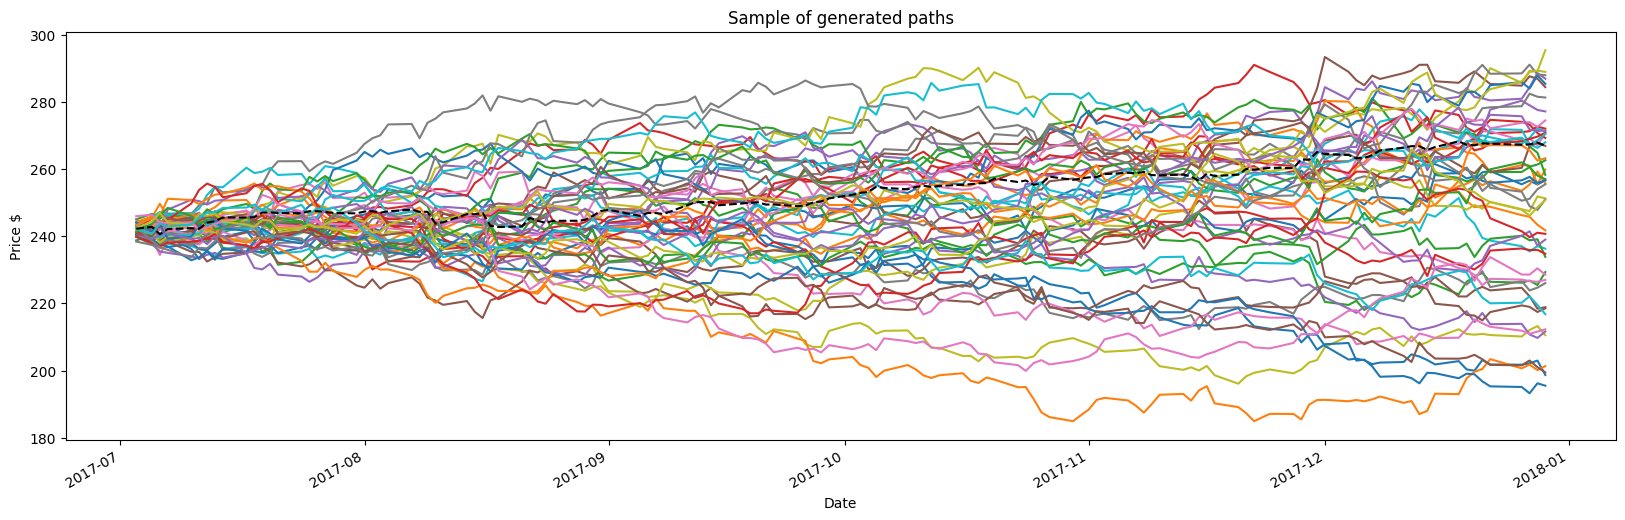

In [17]:
plot_simulated_paths(spy, simulation, n)

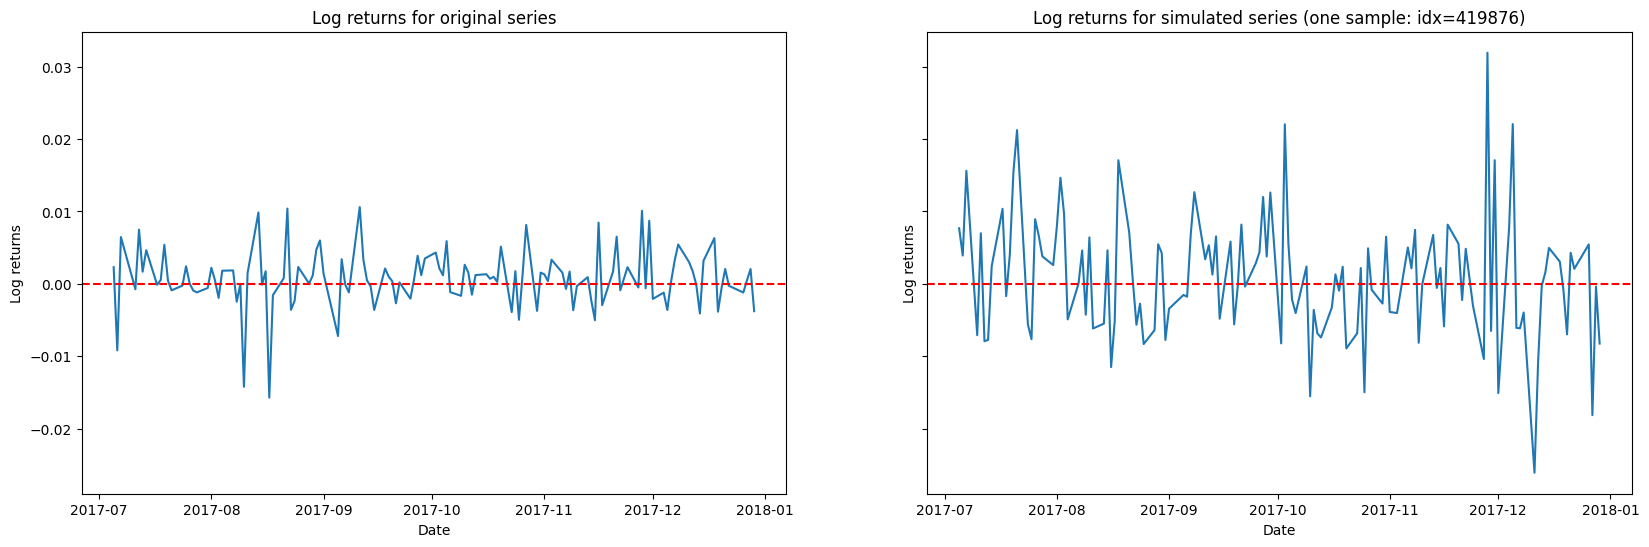

In [19]:
plot_return_comparison(spy, simulation, n)

  0%|          | 0/10000 [00:00<?, ?it/s]

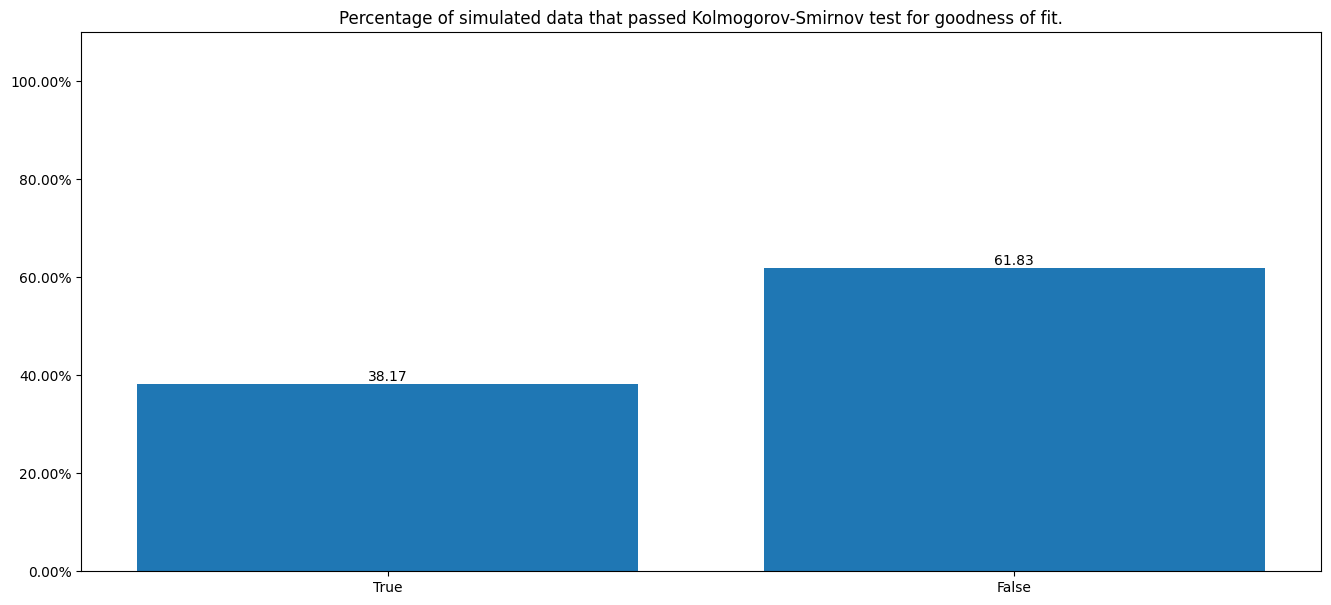

In [21]:
# Make comparison using the whole original dataset (we expect worse outcomes)
num_samples = min(10_000, len(simulation2) * 0.1)
selection2 = np.random.choice(range(len(simulation2)), num_samples)
results2 = []
for idx in tqdm(selection2):
    test = st.kstest(
        get_standard_returns(spy["Close"].values),
        get_standard_returns(simulation2[idx, :]),
    )
    results2.append(test.pvalue > 0.05)


plot_ks_comparison(results2)

### Same approach, but with different seed

In [22]:
mmar2 = MMAR(spy["Close"], seed=21)

In [23]:
S0 = spy.Close.iloc[-n]
simulation2 = mmar2.get_MMAR_MC(S0, n=n, num_sim=1_000_000)

  0%|          | 0/10000 [00:00<?, ?it/s]

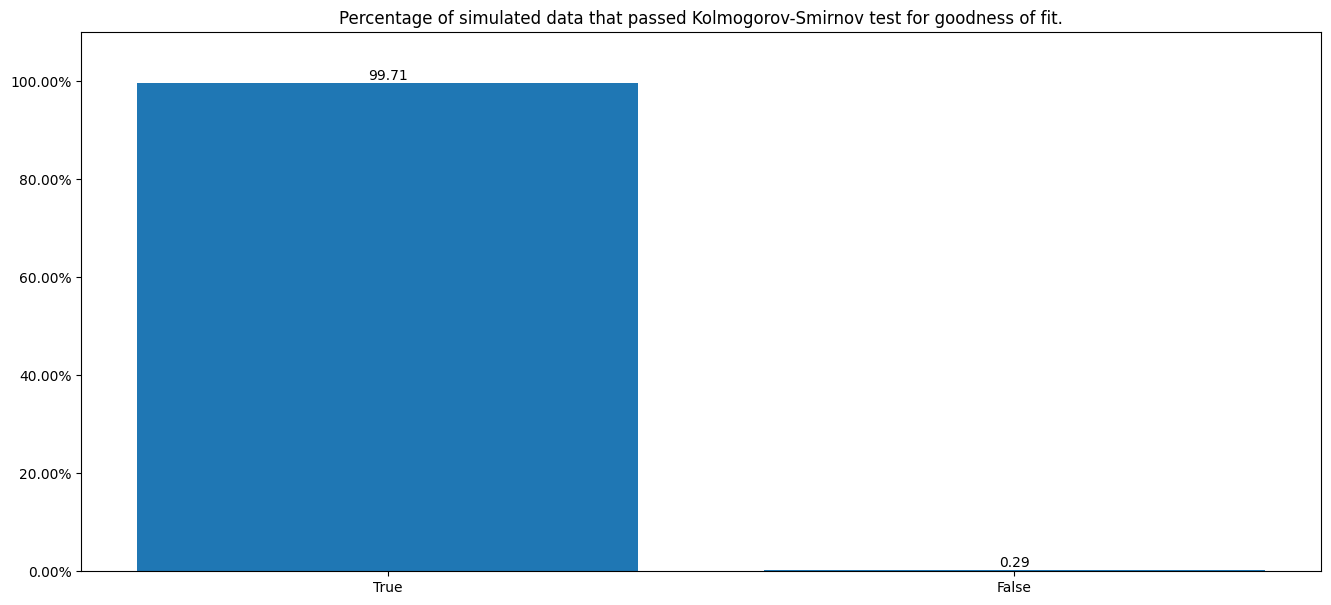

In [24]:
num_samples = min(10_000, len(simulation2) * 0.1)
selection2 = np.random.choice(range(len(simulation2)), num_samples)
results2 = []
for idx in tqdm(selection2):
    test = st.kstest(
        get_standard_returns(spy.iloc[-n:]["Close"].values),
        get_standard_returns(simulation2[idx, :]),
    )
    results2.append(test.pvalue > 0.05)


plot_ks_comparison(results2)

plt.show()

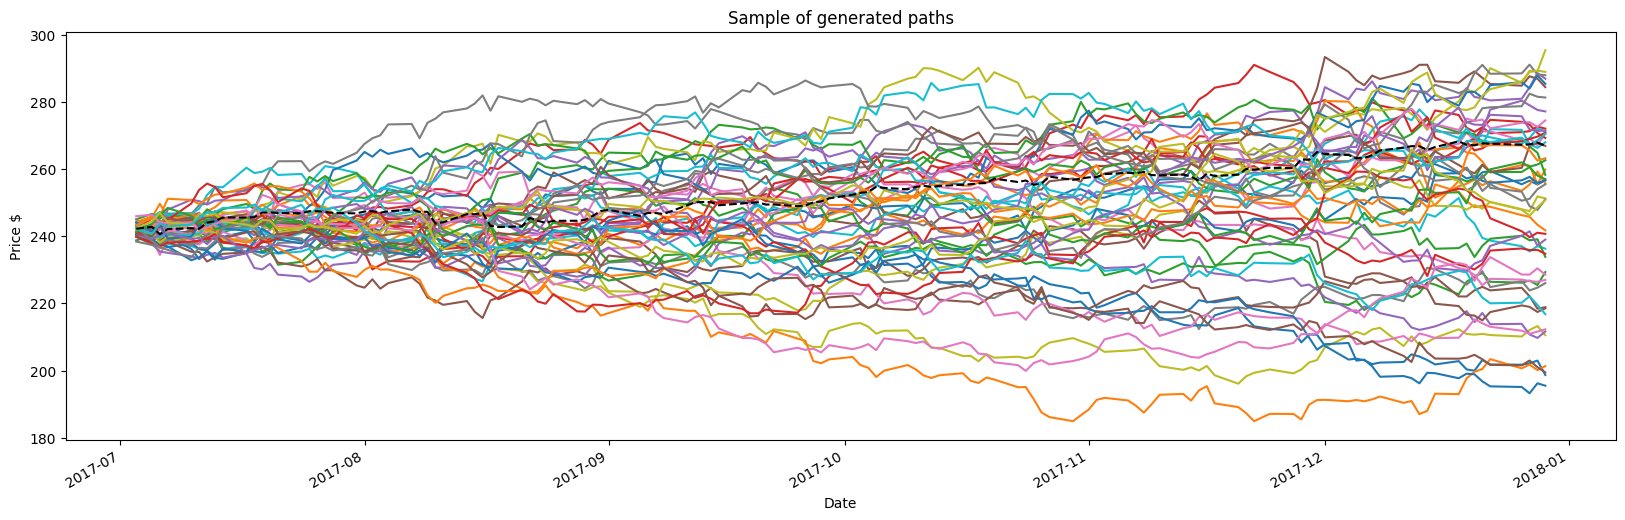

In [25]:
plot_simulated_paths(spy, simulation, n)

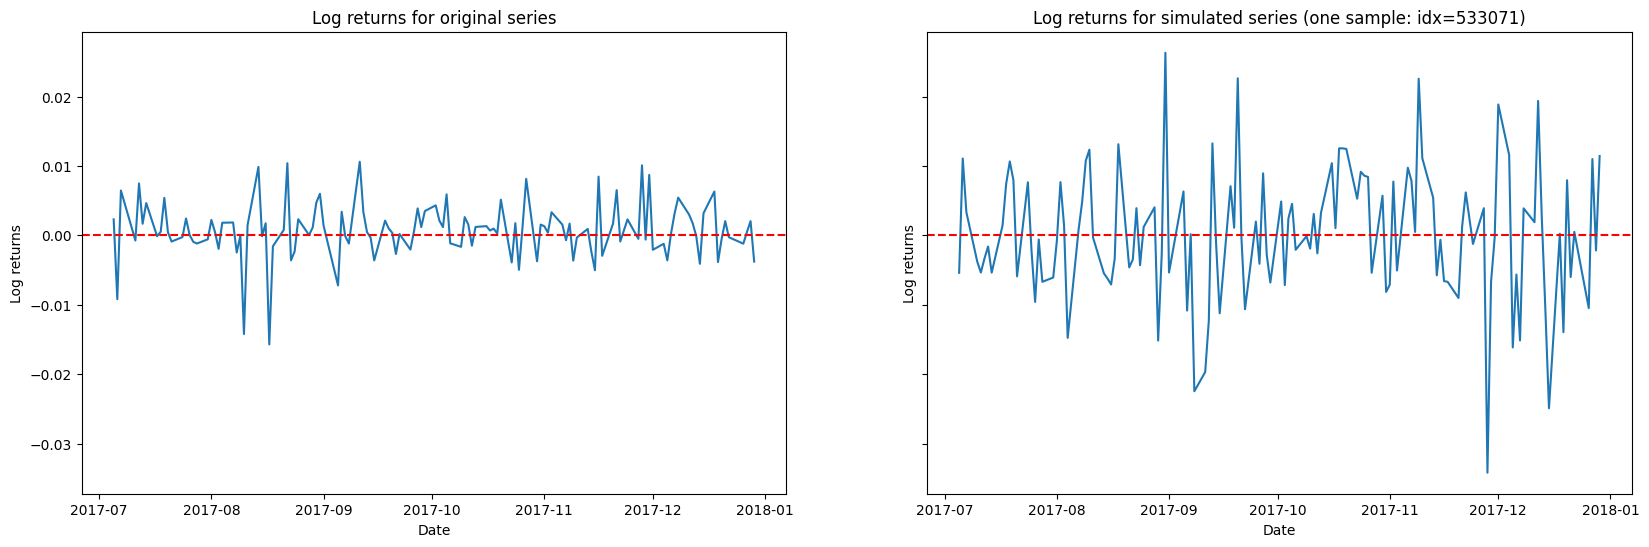

In [26]:
plot_return_comparison(spy, simulation, n)

  0%|          | 0/10000 [00:00<?, ?it/s]

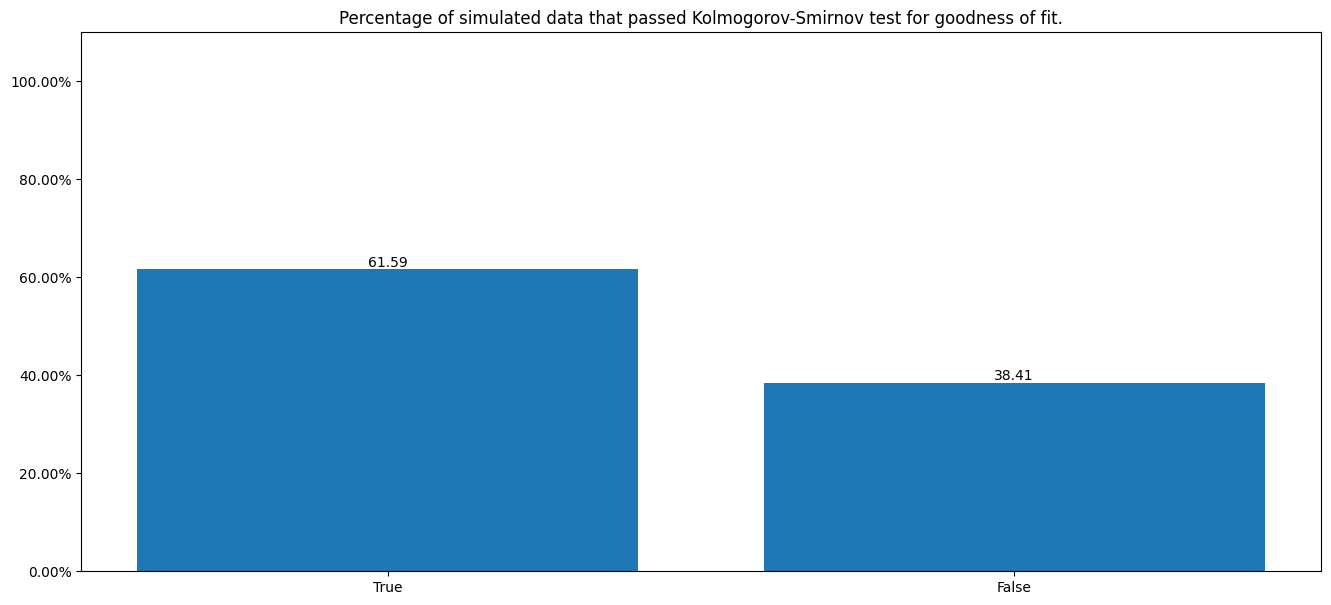

In [27]:
# Make comparison using the whole original dataset (we expect worse outcomes)
num_samples = min(10_000, len(simulation2) * 0.1)
selection2 = np.random.choice(range(len(simulation2)), num_samples)
results2 = []
for idx in tqdm(selection2):
    test = st.kstest(
        get_standard_returns(spy["Close"].values),
        get_standard_returns(simulation2[idx, :]),
    )
    results2.append(test.pvalue > 0.05)


plot_ks_comparison(results2)

The comparison shows that using the Volume approach gives better results than a pure random method which is higly influenced by the inital seed (something over which we have no control). Since we use only a fraction of the Volumes, the results are better when comparing them with a similar slice of the time series.